In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Modules**

In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import re

# **Load the Dataset**

In [24]:
Crema_Path='/kaggle/input/speech-emotion-recognition-en/Crema/'
#Ravdess_Path='/kaggle/input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24/'
Savee_Path='/kaggle/input/speech-emotion-recognition-en/Savee/'
Tess_Path='/kaggle/input/speech-emotion-recognition-en/Tess/'

In [25]:
paths=[]
labels=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    #label=wav.split('_')[2]
    #print(label)
    if emotion[2]=='SAD':
        paths.append((Crema_Path+wav))
        labels.append('sad')
    elif emotion[2]=='ANG':
        paths.append((Crema_Path+wav))
        labels.append('angry')
    elif emotion[2]=='DIS':
        paths.append((Crema_Path+wav))
        labels.append('disgust')
    elif emotion[2]=='FEA':
        paths.append((Crema_Path+wav))
        labels.append('fear')
    elif emotion[2]=='HAP':
        paths.append((Crema_Path+wav))
        labels.append('happy')
    elif emotion[2]=='NEU':
        paths.append((Crema_Path+wav))
        labels.append('neutral')
    else:
        paths.append((Crema_Path+wav))
        labels.append('unknown')
paths[:5]

['/kaggle/input/speech-emotion-recognition-en/Crema/1028_TSI_DIS_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1075_IEO_HAP_LO.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1084_ITS_HAP_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1067_IWW_DIS_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1066_TIE_DIS_XX.wav']

In [26]:
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        paths.append((Savee_Path+wav))
        labels.append('angry')
    elif emotion=='d':
        paths.append((Savee_Path+wav))
        labels.append('disgust')
    elif emotion=='f':
        paths.append((Savee_Path+wav))
        labels.append('fear')
    elif emotion=='h':
        paths.append((Savee_Path+wav))
        labels.append('happy')
    elif emotion=='n':
        paths.append((Savee_Path+wav))
        labels.append('neutral')
    elif emotion=='sa':
        paths.append((Savee_Path+wav))
        labels.append('sad')
    elif emotion=='su':
        paths.append((Savee_Path+wav))
        labels.append('surprise')
paths[-5:]
labels[-5:]

['surprise', 'neutral', 'neutral', 'angry', 'happy']

In [27]:
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            paths.append((os.path.join(Tess_Path,directory,wav)))
            labels.append('surprise')
        else:
            paths.append((os.path.join(Tess_Path,directory,wav)))
            label = wav.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
#paths[-2000:]
labels[-5:]

['surprise', 'surprise', 'surprise', 'surprise', 'surprise']

# **Creating a DataFrame**

In [28]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust
1,/kaggle/input/speech-emotion-recognition-en/Cr...,happy
2,/kaggle/input/speech-emotion-recognition-en/Cr...,happy
3,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust
4,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust


In [29]:
df['label'].value_counts()

disgust     1731
happy       1731
sad         1731
fear        1731
angry       1731
neutral     1607
surprise     460
Name: label, dtype: int64

# **Exploratory Data Analysis**

<AxesSubplot:xlabel='label', ylabel='count'>

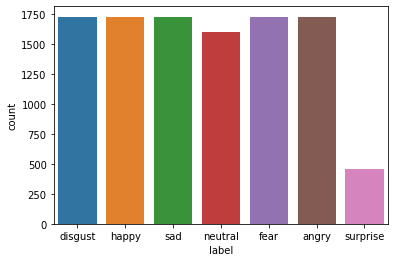

In [30]:
sns.countplot(df['label'])

In [31]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

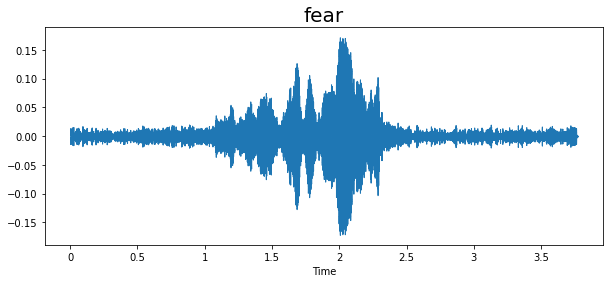

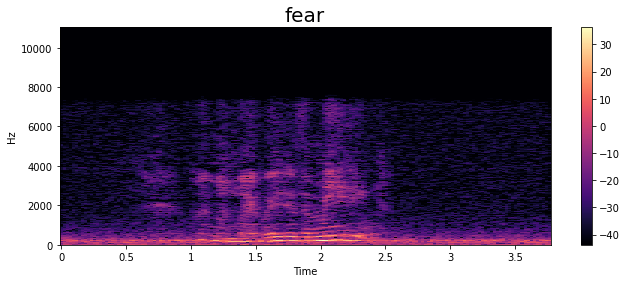

In [32]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

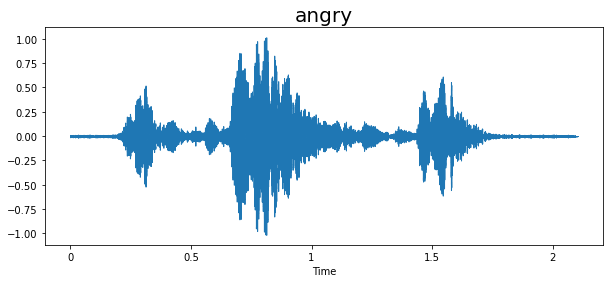

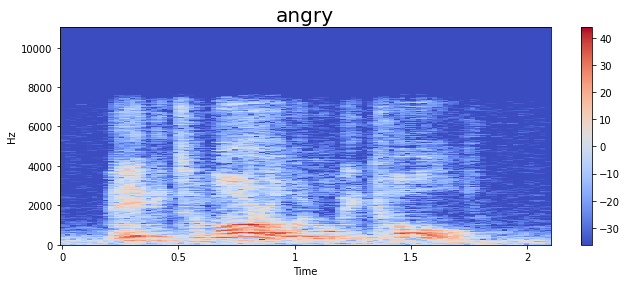

In [33]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

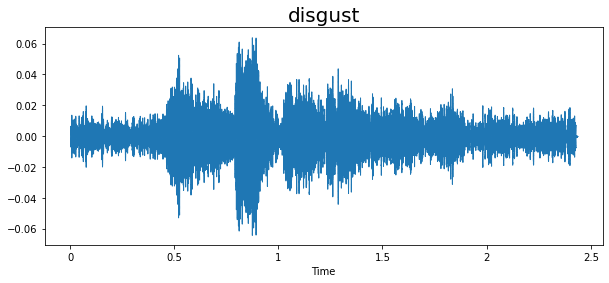

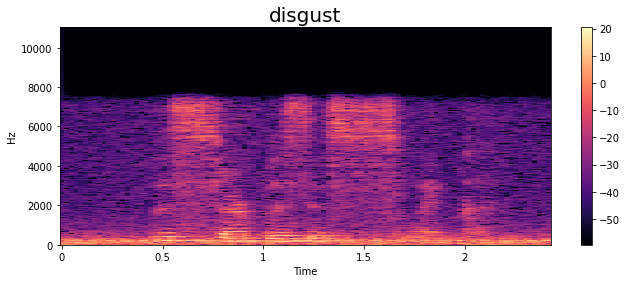

In [34]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

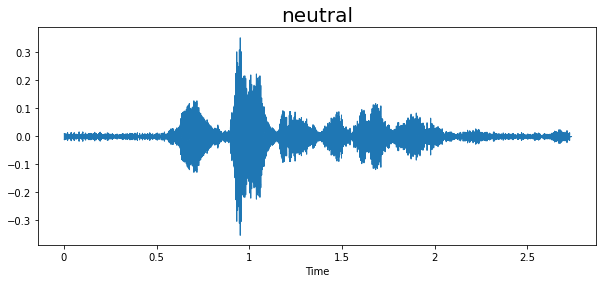

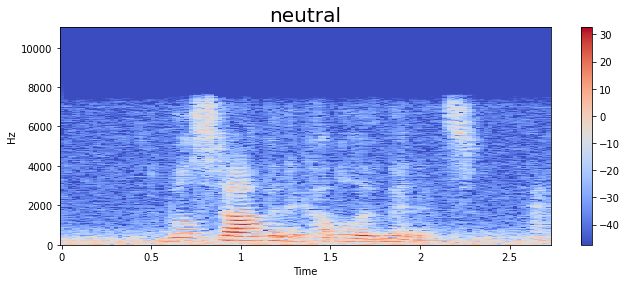

In [35]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

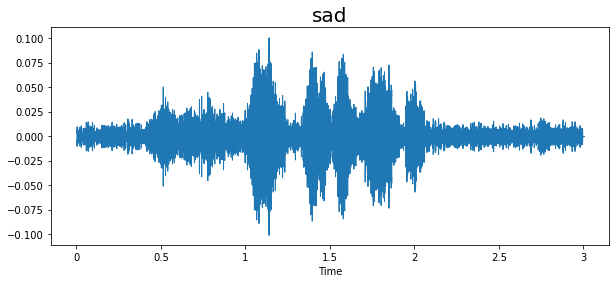

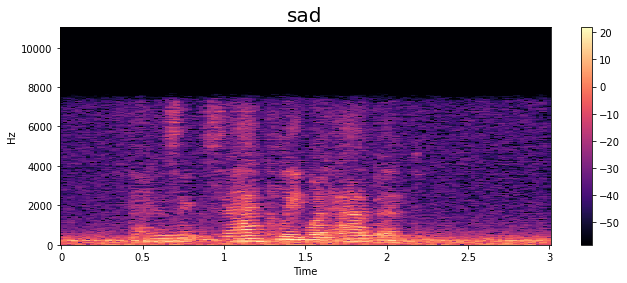

In [36]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

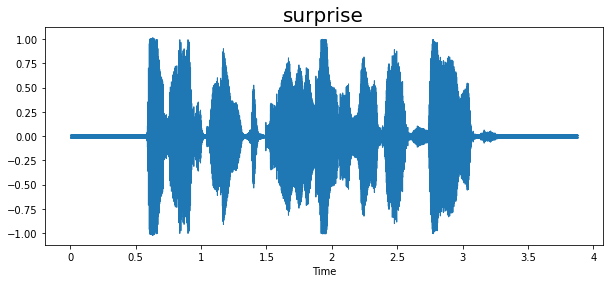

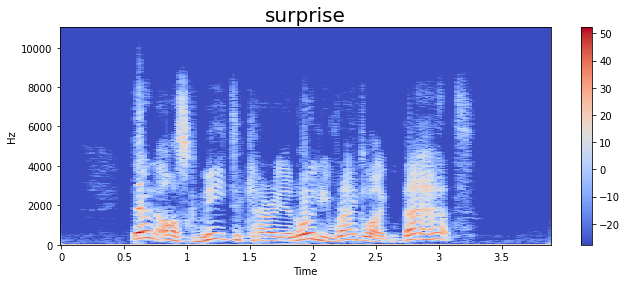

In [37]:
emotion = 'surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


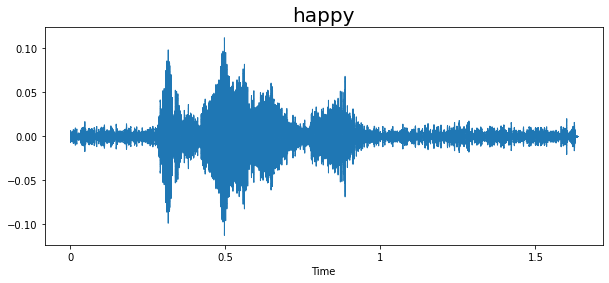

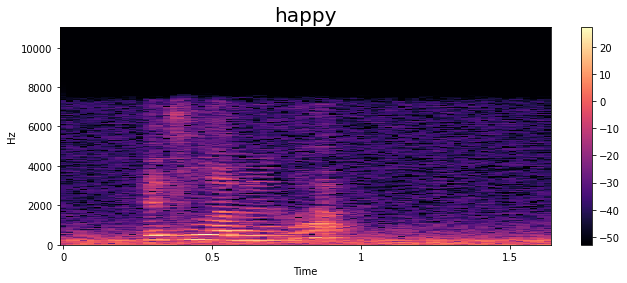

In [38]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction**

In [40]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [41]:
extract_mfcc(df['speech'][0])

array([-417.35895   ,  132.382     ,    2.4006617 ,   78.04398   ,
        -19.31998   ,   42.539383  ,  -32.195377  ,   13.095595  ,
        -14.264867  ,    1.9254175 ,    3.2700737 ,  -13.85477   ,
         12.995992  ,  -11.491112  ,    6.0086465 ,  -14.881661  ,
          6.056325  ,   -8.359356  ,   -4.505984  ,   -1.7885164 ,
         -6.0571833 ,    2.3654811 ,   -5.305844  ,    6.7311263 ,
         -5.7584066 ,    8.108384  ,   -2.8086221 ,    1.3844408 ,
          0.92159927,   -2.4207826 ,    3.3172414 ,   -3.069399  ,
          6.906844  ,   -0.7901824 ,    3.164639  ,   -0.6097331 ,
          1.8477236 ,   -1.8909087 ,   -0.93124324,    2.876079  ],
      dtype=float32)

In [42]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [43]:
X_mfcc

0        [-417.35895, 132.382, 2.4006617, 78.04398, -19...
1        [-433.85382, 149.05438, 6.2608333, 46.211414, ...
2        [-393.7493, 123.30472, 1.5972062, 54.519703, -...
3        [-363.82336, 128.48691, 24.700167, 45.76028, -...
4        [-386.76962, 142.57219, 1.6107662, 48.687588, ...
                               ...                        
10717    [-376.5839, 63.9598, -3.0598662, 11.498796, -2...
10718    [-316.5801, 43.54606, -9.336959, -0.198444, -5...
10719    [-359.7638, 81.01536, -18.355762, 5.3012295, -...
10720    [-354.38315, 103.432144, -15.916284, -10.30884...
10721    [-391.15958, 56.44471, -1.0464002, 0.9587419, ...
Name: speech, Length: 10722, dtype: object

In [44]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(10722, 40)

In [45]:
## input split
X = np.expand_dims(X, -1)
X.shape

(10722, 40, 1)

In [46]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(10722, 7)

# **Create the LSTM Model**

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2022-09-25 12:53:15.137474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:53:15.234556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:53:15.235313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:53:15.237175: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4

In [48]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

2022-09-25 12:59:16.697285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-09-25 12:59:18.961492: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


135/135 [==============================] - 5s 10ms/step - loss: 1.6557 - accuracy: 0.3002 - val_loss: 2.1512 - val_accuracy: 0.2527
Epoch 2/50
135/135 [==============================] - 1s 7ms/step - loss: 1.5577 - accuracy: 0.3366 - val_loss: 2.3249 - val_accuracy: 0.1641
Epoch 3/50
135/135 [==============================] - 1s 8ms/step - loss: 1.4700 - accuracy: 0.3972 - val_loss: 2.4022 - val_accuracy: 0.0793
Epoch 4/50
135/135 [==============================] - 1s 7ms/step - loss: 1.6544 - accuracy: 0.2932 - val_loss: 2.0638 - val_accuracy: 0.3007
Epoch 5/50
135/135 [==============================] - 1s 7ms/step - loss: 1.5101 - accuracy: 0.3622 - val_loss: 2.1773 - val_accuracy: 0.1431
Epoch 6/50
135/135 [==============================] - 1s 7ms/step - loss: 1.4443 - accuracy: 0.3984 - val_loss: 2.1264 - val_accuracy: 0.2862
Epoch 7/50
135/135 [==============================] - 1s 7ms/step - loss: 1.4183 - accuracy: 0.4119 - val_loss: 2.4754 - val_accuracy: 0.2709
Epoch 8/50
135/1

# **Plot the results**

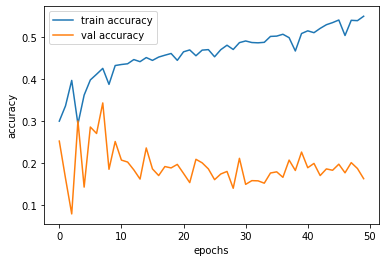

In [49]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

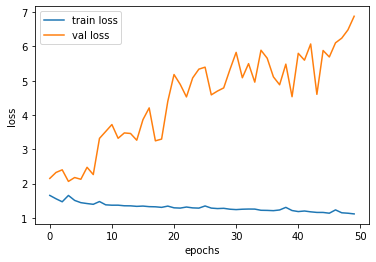

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()